In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from glob import glob

In [2]:
labels = ['O', 'R']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train=get_training_data('C:\\Users\\Gaura\\OneDrive\\Desktop\\recycle_CNN\\TRAIN')
test=get_training_data('C:\\Users\\Gaura\\OneDrive\\Desktop\\recycle_CNN\\TRAIN')

C:\Users\Gaura\AppData\Local\Temp\ipykernel_11096\1866888355.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
train.shape,train.dtype

In [33]:
train

array([[array([[[255, 255, 255],
                [255, 255, 255],
                [255, 255, 255],
                ...,
                [255, 255, 255],
                [255, 255, 255],
                [255, 255, 255]],

               [[255, 255, 255],
                [255, 255, 255],
                [255, 255, 255],
                ...,
                [255, 255, 255],
                [255, 255, 255],
                [255, 255, 255]],

               [[255, 255, 255],
                [255, 255, 255],
                [255, 255, 255],
                ...,
                [255, 255, 255],
                [255, 255, 255],
                [255, 255, 255]],

               ...,

               [[255, 255, 255],
                [255, 255, 255],
                [255, 255, 255],
                ...,
                [255, 255, 255],
                [255, 255, 255],
                [255, 255, 255]],

               [[255, 255, 255],
                [255, 255, 255],
                [255, 255, 25

C:\Users\Gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


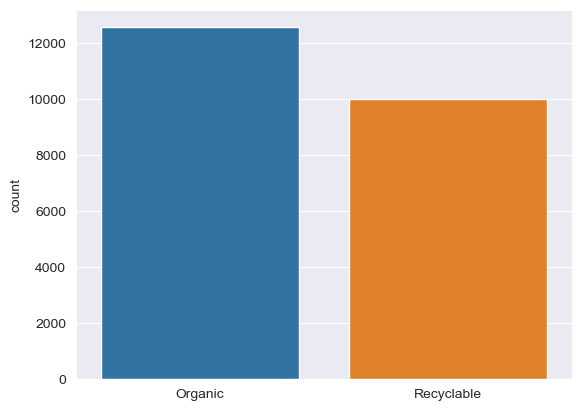

In [37]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Organic")
    else:
        l.append("Recyclable")
sns.set_style('darkgrid')
sns.countplot(l) 
plt.show()

C:\Users\Gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


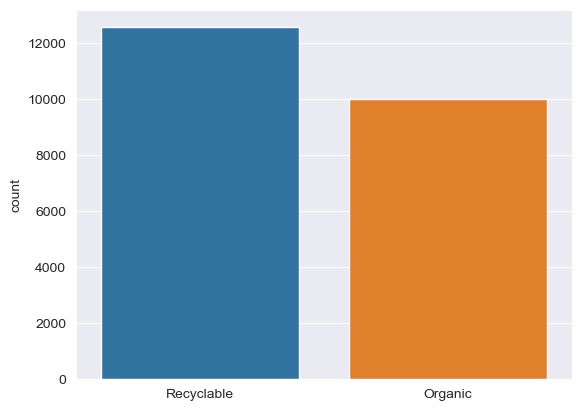

In [36]:
l = []
for i in test:
    if(i[1] == 0):
        l.append("Recyclable")
    else:
        l.append("Organic")
sns.set_style('darkgrid')
sns.countplot(l) 
plt.show()

Text(0.5, 1.0, 'R')

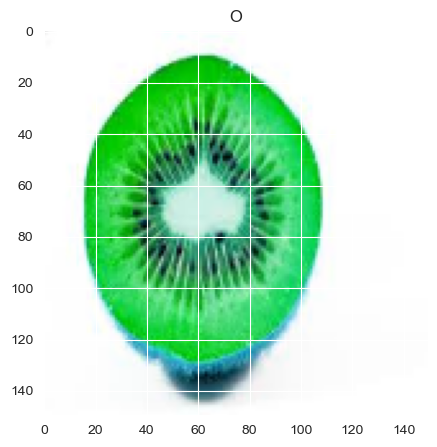

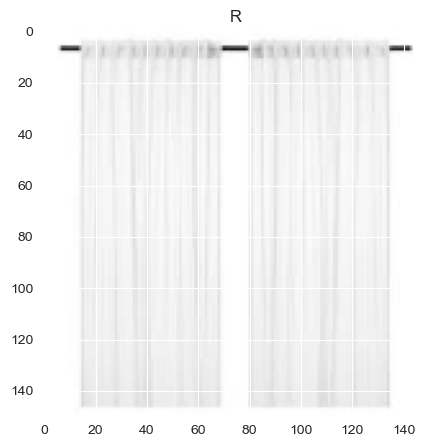

In [32]:
plt.figure(figsize = (5,5))
plt.imshow(train[2][0])
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-2][0])
plt.title(labels[train[-1][1]])